# Regression

## Overview

Regression is about finding the relationship between variables. Consider the following example. 

<img src="images/regression_abstract.png" alt="Example for Classification" style="width: 500px;"/>

We may be interested in the relationship between different properties of cars. Two important properties are fuel consumption and the top speed of cars. Usually, cars that can reach a higher top speed have stronger motors that consume more fuel. With regression, we can model the relationship between the variables using data about a sample of cars. 

A bit more abstract, regression looks as follows.

<img src="images/regression_general.png" alt="Example for Classification" style="width: 600px;"/>

We have a set of instances for which features are known. In regression analysis, the features are also often called the *independent variables*. We want to know the relationship between the features and a *dependent variable*, i.e., our value of interest. In the figure above, $x$ is our feature and $y$ is our dependent variable. Through the regression model we can describe how $y$ changes, when $x$ changes. The example shows a *Linear Regression*, i.e., regression through a linear model, which is a line in two dimensions. 

### The Formal Problem

Formally, we have a set of objects $O = \{object_1, object_2, ...\}$ that may be infinite. Moreover, we have representations of these objects in a feature space $\mathcal{F} \{\phi(o): o \in O\}$ that we assume is a subset of the real values, i.e., $\mathcal{F} \subseteq \mathbb{R}^m$. For each object, our value of interest is a dependent variable $f^*(o) = y \in \mathbb{R}$. 

The task of regression is to estimate a regression function $f: \mathcal{F} \to \mathbb{R}$ such that $f(\phi(o)) \approx f^*(o)$. 

## Performance of Regressions

Same as with classification, an important question is how we can estimate if a regression function is a good approximation of the dependent variable. We discuss the performance of Linear Regression using the two examples below. 

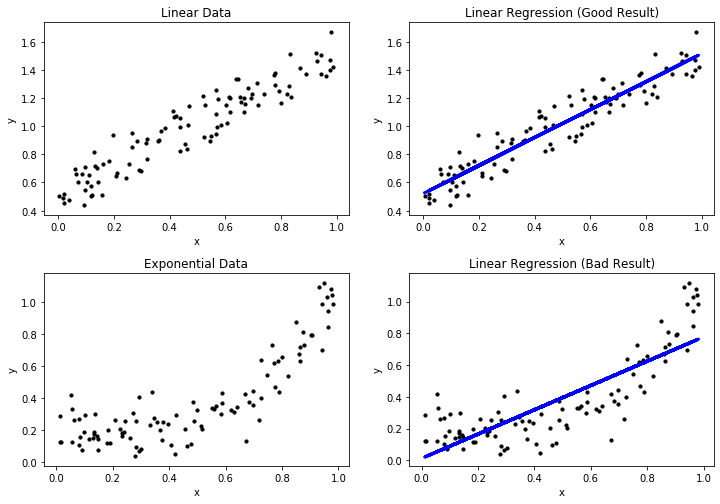

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(seed=0)
n = 100

# Linear data
X_lin = np.random.rand(n, 1)
Y_lin = X_lin+np.random.randn(n, 1)*0.1+0.5

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_lin, Y_lin)
Y_lin_pred = regr_lin.predict(X_lin)

# Exponential data
X_exp = np.random.rand(n, 1)
Y_exp = X_exp**4+np.random.randn(n, 1)*0.1+0.19

# Train and predict
regr_lin = LinearRegression()
regr_lin.fit(X_exp, Y_exp)
Y_exp_pred = regr_lin.predict(X_exp)


# Scatterplot
f, axes = plt.subplots(2, 2, figsize=(12, 7))

axes[0, 0].set_title('Linear Data')
axes[0, 0].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')

axes[0, 1].set_title('Linear Regression (Good Result)')
axes[0, 1].scatter(X_lin, Y_lin,  color='black', s=10)
axes[0, 1].plot(X_lin, Y_lin_pred, color='blue', linewidth=3)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')

axes[1, 0].set_title('Exponential Data')
axes[1, 0].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')

axes[1, 1].set_title('Linear Regression (Bad Result)')
axes[1, 1].scatter(X_exp, Y_exp,  color='black', s=10)
axes[1, 1].plot(X_exp, Y_exp_pred, color='blue', linewidth=3)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

The first example shows a very good regression model, where the regression function depicted in blue matches the data. This is expected, because we generated the data with a linear expression and use a linear expression model. The second example shows a bad regression model, because the regression does not really match the data. This is expected, because we fit a linear model to exponential data. In the following, we refer to the first example as the good result, and the second example as the bad result. In terms of regression, good/bad results are also called a good/bad *fit* of the data

### Visual Performance Assessment

The plots above already show the first method for the assessment of the quality of a regression model. We can plot the actual data and the regression function together in the same plot. Through this, we can see if the regression is close to the actual data and, therefore, likely a good fit. Moreover, we can see systematic errors in the regression. In the good result, we see that the actual data is evenly scattered around the regression line without a large deviation. Hence, we can see that there are small errors in the regression model, but there is no clearly discernable pattern in these errors. This is different for the bad result: at the beginning, the instances are all above the blue line, between 0.4 and 0.7 the instances are below the blue line and at the end the instances are, again, all above the blue line. This clear pattern is a strong indicator for a bad fit, because there is clearly an aspect of the data that is not covered by the regression model. When the instances are all above the blue regression line, we say that the regression function *under predicts*, when the instances are all below the regression line, we say that the regression function *over predicts*.  

Another way to look at the results of a prediction model visually is through the *residuals*. The residual of an instance $x \in \mathcal{F}$ for a regression function $f$ is defined as

$$e_x = f^*(x)-f(x) = y-f(x),$$

i.e., the difference between the actual value and the prediction. We can plot the residuals versus the values of a feature, to see how the deviation evolves.

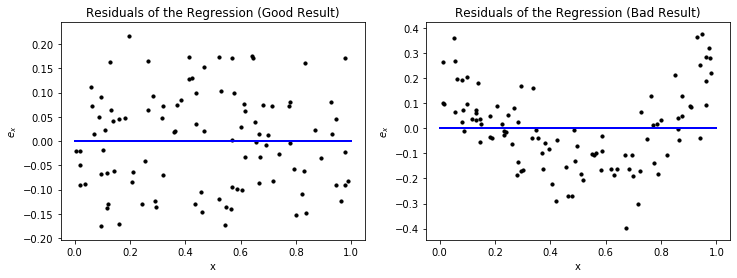

In [29]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Residuals of the Regression (Good Result)')
axes[0].scatter(X_lin, Y_lin-Y_lin_pred,  color='black', s=10)
axes[0].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[0].set_xlabel('x')
axes[0].set_ylabel('$e_x$')

axes[1].set_title('Residuals of the Regression (Bad Result)')
axes[1].scatter(X_exp, Y_exp-Y_exp_pred,  color='black', s=10)
axes[1].plot([0, 1],[0,0] , color='blue', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('$e_x$')

plt.show()

The residuals provide a similar view on the error of the regression function as we have seen above. However, just looking at the plots, one may think that the left plot for the good result is actually bad, because the spread from the blue line, which indicates correct predictions, looks large. However, a closer look at the y-axis reveals that this is only because the absolute values of the results are very small. If the y-axis would have a larger range, a bad result could indeed look similar. Thus, it is always important to consider the scale of the y-axis of residual plots in order to investigate the absolute magnitude of the residuals. For the bad result, we see the same over and under prediction patterns we observed before. We also see that the range of the y-axis is much larger than for the good result, which also indicates that this is not a good result. 

The drawback of the above visualizations is that they only work for single features. However, there is another way of visual analysis that allows us to gain insights into the data. The idea is similar to the confusion matrix we know from [Chapter 7](07_Classification): we plot the actual values of the dependent variable versus the predicted values. 

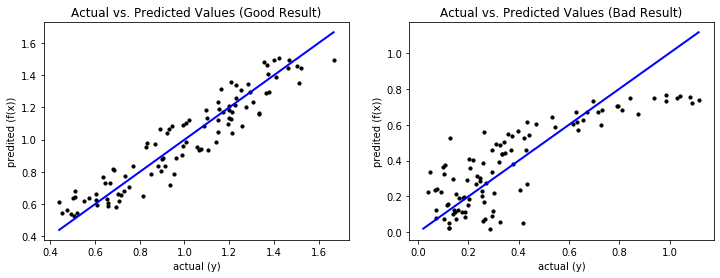

In [24]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].set_title('Actual vs. Predicted Values (Good Result)')
axes[0].scatter(Y_lin, Y_lin_pred,  color='black', s=10)
axes[0].plot([np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))],[np.min(np.minimum(Y_lin, Y_lin_pred)), np.max(np.maximum(Y_lin, Y_lin_pred))] , color='blue', linewidth=2)
axes[0].set_xlabel('actual (y)')
axes[0].set_ylabel('predited (f(x))')

axes[1].set_title('Actual vs. Predicted Values (Bad Result)')
axes[1].scatter(Y_exp, Y_exp_pred,  color='black', s=10)
axes[1].plot([np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))],[np.min(np.minimum(Y_exp, Y_exp_pred)), np.max(np.maximum(Y_exp, Y_exp_pred))] , color='blue', linewidth=2)
axes[1].set_xlabel('actual (y)')
axes[1].set_ylabel('predited (f(x))')

plt.show()

Ideally, the prediction equals the actual values, which is on the diagonal of the plot. The further away the data is from the diagonal, the worse the prediction. For a good result, the predictions are close to the diagonal and the deviations are random without a clear pattern, similar to our prior visual analysis. For a bad result, the deviations from the diagonal are larger and there may be patterns that show systematic errors. This is the case for the bad result. For the data where the actual values are less than 0.35, the prediction is completely random, which we can see due to the random pattern with large deviations from the diagonal in this area. For larger actual values, we see systematic errors: first there is over prediction, then there is under prediction. 

### Performance Metrics

There are also several performance metrics that can be used to assess the quality of regression models. These metrics are based on the residuals. Let $X = \{x_1, ..., x_n\} \subseteq \mathcal{F} \subseteq \mathbb{R}^m$ a sample of instance with $m$ features and $Y = \{y_1, ..., y_n\} \subseteq \mathbb{R}$ the corresponding dependent variables. 

| Metric | Description | Definition |
|--------|-------------|------------|
| Mean Absolute Error | The arithmetic mean of the absolute residuals, i.e., the mean absolute deviation of the predictions from the actual values. | $MAE = \frac{1}{n} \sum_{i=1}^n \vert e_{x_i} \vert$ |
| Mean Squared Error | The arithmetic mean of the squared residuals. | $MSE = \frac{1}{n} \sum_{i=1}^n e_{x_i}^2$ |
| R Squared, R2, $R^2$ | The coefficient of determination, which is defined as the fraction of the variance of the data that is explained by the regression model. | $R^2 = 1 - \frac{\sum_{i=1}^n (y_i-f(x_i))^2}{\sum_{i=1}^n (y_i-mean(Y))^2}$
| Adjusted R Squared | Adjustment of $R^2$ that takes the model complexity into account | $\bar{R}^2 = 1 - (1-R^2)\frac{n-1}{n-m-1}$ |

The MAE measures the absolute difference between the predictions and the actual values. The similar measure MSE uses the squared distances instead of the actual distances. Because the MSE uses the squared residuals, it is more sensitive to outliers in the residuals than MAE. Thus, MSE increases strongly with outliers, while these may be hidden with MAE. The biggest problem with MAE and MSE is that both are absolute measures for the error and, thus, hard to interpret because there is no fixed reference point. The performance measures for classification were mostly distributed in the interval [0,1] and it was clear what a perfect result looks like and what the worst possible result looks like. To interpret MAE and MSE, detailed knowledge about the dependent variable is required, especially about the scale of the dependent variable and the meaning of differences. 

In that respect, $R^2$ is more similar to the metrics we know from classification and is distributed in the interval [0,1], where 1 is a perfect value. $R^2$ answers the question how much better the regression function is than just using the arithmetic mean of the data. The sum in the denominator is over the residuals of the arithmetic mean as the regression function. In the nominator, we have the sum of the residuals of the regression. If we would divide both the nominator and denominator by $|X|$, we would have the MSE as nominator and the variance as denominator. In other words, $R^2$ measures the ratio of the MSE of the model and the variance of the dependent variable. The lower the MSE in relation to the variance, the better.

A weakness of $R^2$ is that this usually increases with more features, which can lead to overfitting. Adjusted $R^2$ addresses this weakness by taking the number of features into account. Thus, if the decrease in MSE is less than the penalty of adjusted $R^2$ for the number of features, adjusted $R^2$ increases. 

We now look at the values of these performance metrics for our example. 

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2_score(Y, Y_pred, n_instances, n_features):
    return (1-(1-r2_score(Y, Y_pred))*(n_instances-1)/(n_instances-n_features-1))

print('Performance Metrics (Good Result)')
print('MAE:         %.2f' % mean_absolute_error(Y_lin, Y_lin_pred))
print('MSE:         %.2f' % mean_squared_error(Y_lin, Y_lin_pred))
print('R2:          %.2f' % r2_score(Y_lin, Y_lin_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_lin, Y_lin_pred, n, 1))
print()
print('Performance Metrics (Bad Result)')
print('MAE:         %.2f' % mean_absolute_error(Y_exp, Y_exp_pred))
print('MSE:         %.2f' % mean_squared_error(Y_exp, Y_exp_pred))
print('R2:          %.2f' % r2_score(Y_exp, Y_exp_pred))
print('Adjusted R2: %.2f' % adjusted_r2_score(Y_exp, Y_exp_pred, n, 1))

Performance Metrics (Good Result)
MAE:         0.08
MSE:         0.01
R2:          0.89
Adjusted R2: 0.89

Performance Metrics (Bad Result)
MAE:         0.13
MSE:         0.03
R2:          0.68
Adjusted R2: 0.68


We directly observe the problem with MAE and MSE: because we have randomly generated data, MAE and MSE have no real meaning for us. We only see that the values of the bad result are larger than the values for the good result: about 60% higher for MAE and about 3 times higher for MSE. Please note that the values for MSE are less than the values for MAE, because $x^2 < x$ for $x \in (0,1)$. This further emphasizes that the interpretation of MAE and MSE is difficult. 

For $R^2$ we also see that the value of the good result is much larger than of the bad result. The bad result explains only about 2/3 of the variance, while the good result explains almost 90%. Adjusted $R^2$ is not different, because we only have a single feature. 

## Linear Regression

We already encountered Linear Regression, e.g., in [Chapter 7](07_Classification) when we discussed Logistic Regression or in the example above. We now take a closer look at how Linear Regression works. The formula of the regression function of Linear Regression is

$$y = b_0 + b_1x_1 + ... + b_mx_m = b_0 + \sum_{i=1}^m b_ix_i$$

with *coefficients* $b_1, ..., b_m \in \mathbb{R}$ and the *intercept* $b_0$. The coefficients define how a feature influences the dependent variable. The coefficients are closely related to the correlation between the dependent variable and the features. Usually, a positive coefficient means that the feature is positively correlated to the dependent variable, a negative coefficient means that there is a negative correlation. However, there are also exceptions to this general rule, as we will see in the next sections. 

The intercept is the "base value" of the dependent variable, i.e., the value of the dependent variable if all features would be zero. This concept can be visualized as the location where a regression line *intercepts* the axis of the coordinate system. 

The key aspect of Linear Regression is how the coefficients and intercept are determined, as this can affect not only the quality of the regression function, but also how the coefficients may be interpreted. 

### Ordinary Least Squares

The standard way to estimate the coefficients of Linear Regression is using the *Ordinary Least Squares* (OLS) method. For this, we interpret the instance as matrix and the dependent variables and coefficients as vectors:

$$
\begin{split}
X &= \begin{pmatrix}
x_{1,1} & \dots & x_{1,m} \\
\vdots & \ddots & \vdots \\
x_{n,1} & \dots & x_{n,m} 
\end{pmatrix} \\
y &= (y_1, \dots, y_n) \\
b &= (b_1, \dots, b_m)
\end{split}$$

Because of this, we can use matrix multiplication to calculate all the predictions given a set of coefficients as a single vector, i.e., 

$$f(X) = b_0 + Xb.$$

Since we want to minimize the residuals, we can formulate this as an optimization problem

$$\min ||f(X) - f^*(X)||_2^2 = \min ||b_0 + Xb - y||_2^2.$$

Hence, we minimize the square of the Euclidean norm (see [Chapter 6](06_Clustering.html#Measuring-Similarity)), in other words we are looking for the solution with the *least squares*.

Because we have more instances than features (otherwise we have too many features), there are usually multiple optimal solutions for this optimization problem. While these solutions are the same with respect to the OLS, there can be interesting effects if the features are correlated with each other. This can be demonstrated with an example. 

Consider two features $x_1, x_2$ and a dependent variable $y$ such that $y = x_1 = x_2$. Here are some examples for optimal solutions:

- Solution 1: $b_0 = 0, b_1=0.5, b_2=0.5$
- Solution 2: $b_0 = 0, b_1=1, b_2=0$
- Solution 3: $b_0 = 0, b_1=0, b_2=1$
- Solution 4: $b_0 = 0, b_1=10000, b_2=-9999$

In general, any solution with $b_0=0$ and $b_1+b_2=1$ is optimal. The first three solutions we listed seem reasonable. However, a solution with very large coefficients is also possible and optimal. This also demonstrates that the coefficients of features can be misleading in terms of correlation with the dependent variable. In the example above $b_1$ and $b_2$ can assume any real value and, thus indicate any possible correlation. 

### Ridge

In the following, we show how OLS can be modified with *regularization* to find the first three solutions and avoid the problems with correlated features. The idea of regularization is simple: when the optimization problem allows multiple solutions, some of which are more desirable than others, we modify the problem such that favorable solutions are better. This is done by adding a *regularization term* to the OLS formula. 

*Ridge* regularization is based on the idea that smaller values for coefficients are better than larger values. Thus, we should select the optimal solution that minimizes the values of the coefficients. To achieve this, the OLS problem is modified such that

$$\min ||b_0 + Xb - y||_2^2 + \alpha ||b||_2^2$$

where $\alpha \in \mathbb{R}, \alpha>0$ regulates the strength of the regularization term. To demonstrate the effect of this regularization, we calculate $||b||_2^2$ for the four solutions of our example above:

- Solution 1: $||b||_2^2 = \sqrt{0.5^2+0.5^2}^2 = 0.5$
- Solution 2/3: $||b||_2^2 = \sqrt{1^2+0^2}^2 = 1.0$
- Solution 4: $||b||_2^2 = \sqrt{10000^2+(-9999)^2}^2 = 199980001$

Thus, ridge would select the first solution.

### Lasso

Another commonly used regularization technique is *lasso*. While ridge leads to small coefficients, the correlated variables are still both non-zero. A model with similar performance, that uses fewer features is often better, because the likelihood of overfitting is reduced. The goal of lasso is to not only minimize the coefficient values of correlated variables, but to achieve that they become exactly zero. For this, the OLS problem is modified such that

$$\min ||b_0 + Xb - y||_2^2 + \alpha ||b||_1,$$

i.e., the difference to ridge is the norm that is used. Ridge uses the squared euclidean distance, whereas Lasso uses the Manhattan distance. When we look at the solutions, we get the following.

- Solution 1: $||b||_1 = |0.5|+|0.5| = 1.0$
- Solution 2/3: $||b||_1 = |1|+|0| = 1.0$
- Solution 4: $||b||_1 = |10000|+|-9999| = 19999.0$

Thus, Solutions 1, 2, and 3 would be optimal for lasso, which means it is likely that a solution is selected, where a coefficient is exactly zero. 

> Note:
> 
> We do not provide a detailed explanation of why Ridge only minimizes the values of the coefficients, while Lasso tries to find coefficients that are exactly zero, here. The short explanation is that the regularization term can also be considered as a constraint on the optimization problem. The shape of this constraint is a circle for Ridge and a diamond for Lasso, because that is the shape of the unit circles of the Euclidean and the Manhattan norm. Due to the diamond shape, values of exactly zero are likely with Lasso. A full explanation for this, can, e.g., be found [here](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b).

### Elastic Net

The last regularization variant is the *elastic net*. The elastic net combines ridge and lasso regularization and uses both the squared Euclidean norm and the Manhattan norm, i.e., 

$$\min ||b_0 + Xb - y||_2^2 + \rho \alpha ||b||_1 + \frac{1-\rho}{2}\alpha ||b||_2^2$$

where $\rho \in [0,1]$ defines the weighting between ridge and lasso. With $\rho=0$, the elastic net uses only ridge regularization, with $\rho=1$, the elastic net uses only lasso regularization. The goal of combining lasso and ridge is to enforce low coefficients, but ideally also try to reduce them to exactly zero, if possible.

### Impact of Regularization

We now revisit the Boston data, we already know from [Chapter 3](03_Data-Exploration) and create a Linear Regression for the data. We compare the results of OLS, Ridge, Lasso, and the Elastic Net. We use $\alpha=0.5$ as regularization strength and $\rho=0.25$ as ratio between Ridge and Lasso for the Elastic Net. The bar charts show how the coefficients change. 

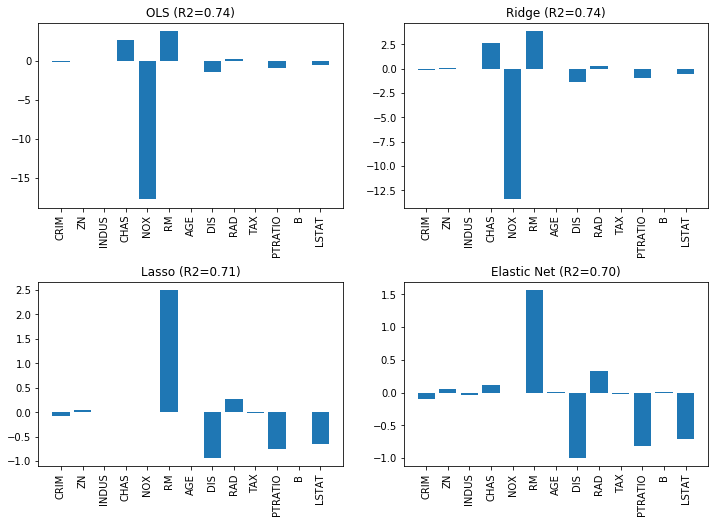

In [82]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, ElasticNet

boston = datasets.load_boston()
predictors = boston.feature_names
X_boston=boston.data
Y_boston=boston.target

alpha = 0.5

# OLS linear regression
ols = LinearRegression()
ols.fit(X_boston, Y_boston)
Y_ols = ols.predict(X_boston)

ridge = Ridge(alpha=alpha)
ridge.fit(X_boston, Y_boston)
Y_ridge = ridge.predict(X_boston)

lasso = Lasso(alpha=alpha)
lasso.fit(X_boston, Y_boston)
Y_lasso = lasso.predict(X_boston)

elastic = ElasticNet(alpha=alpha, l1_ratio=0.25)
elastic.fit(X_boston,Y_boston)
Y_elastic = elastic.predict(X_boston)

fig, axes = plt.subplots(2,2, figsize=(12,7))
axes[0,0].set_title('OLS (R2=%.2f)' % r2_score(Y_boston, Y_ols))
axes[0,0].bar(predictors, ols.coef_)
axes[0,0].tick_params(axis='x', labelrotation=90)

axes[0,1].set_title('Ridge (R2=%.2f)' % r2_score(Y_boston, Y_ridge))
axes[0,1].bar(boston.feature_names, ridge.coef_)
axes[0,1].tick_params(axis='x', labelrotation=90)

axes[1,0].set_title('Lasso (R2=%.2f)' % r2_score(Y_boston, Y_lasso))
axes[1,0].bar(boston.feature_names, lasso.coef_)
axes[1,0].tick_params(axis='x', labelrotation=90)

axes[1,1].set_title('Elastic Net (R2=%.2f)' % r2_score(Y_boston, Y_elastic))
axes[1,1].bar(boston.feature_names, elastic.coef_)
axes[1,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.4)
plt.show()

We can see the effects quite clearly. The value of the largest coefficient, NOX is the most interesting value. We clearly see how this coefficient changes for the different models: with OLS the value is around 18, with Ridge it drops to around 13, and with Lasso to exactly zero and is eliminated. With Ridge, there is not even an impact on the $R^2$ score, which remains unchanged. Lasso drops not only NOX, but also INDUS, CHAS, and AGE. Even though fewer features are used, the $R^2$ score drops only slightly. With the Elastic Net, fewer features are dropped, but NOX is still dropped and the overall value of the coefficients are lower than with Lasso.

Overall, we see a strong effect of the regularization on the coefficients and also observe that regularization must be used with care: if the regularization is too strong, the focus of the optimization problem is not to find a good fit, but to find low coefficients. Consider the same example, but with $\alpha=5$, i.e., ten times stronger regularization.

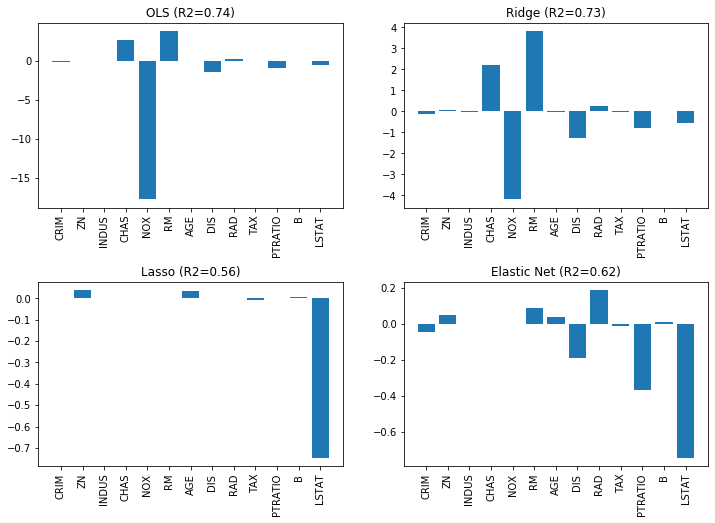

In [81]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, ElasticNet

boston = datasets.load_boston()
predictors = boston.feature_names
X_boston=boston.data
Y_boston=boston.target

alpha = 5

# OLS linear regression
ols = LinearRegression()
ols.fit(X_boston, Y_boston)
Y_ols = ols.predict(X_boston)

ridge = Ridge(alpha=alpha)
ridge.fit(X_boston, Y_boston)
Y_ridge = ridge.predict(X_boston)

lasso = Lasso(alpha=alpha)
lasso.fit(X_boston, Y_boston)
Y_lasso = lasso.predict(X_boston)

elastic = ElasticNet(alpha=alpha, l1_ratio=0.25)
elastic.fit(X_boston,Y_boston)
Y_elastic = elastic.predict(X_boston)

fig, axes = plt.subplots(2,2, figsize=(12,7))
axes[0,0].set_title('OLS (R2=%.2f)' % r2_score(Y_boston, Y_ols))
axes[0,0].bar(predictors, ols.coef_)
axes[0,0].tick_params(axis='x', labelrotation=90)

axes[0,1].set_title('Ridge (R2=%.2f)' % r2_score(Y_boston, Y_ridge))
axes[0,1].bar(boston.feature_names, ridge.coef_)
axes[0,1].tick_params(axis='x', labelrotation=90)

axes[1,0].set_title('Lasso (R2=%.2f)' % r2_score(Y_boston, Y_lasso))
axes[1,0].bar(boston.feature_names, lasso.coef_)
axes[1,0].tick_params(axis='x', labelrotation=90)

axes[1,1].set_title('Elastic Net (R2=%.2f)' % r2_score(Y_boston, Y_elastic))
axes[1,1].bar(boston.feature_names, elastic.coef_)
axes[1,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.4)
plt.show()


While Ridge still works and the coefficients are further reduced, Lasso and Elastic Net focus too much on the coefficients the $R^2$ value drops drastically. Thus, the choice of $\alpha$ should always be evaluated with respect to the goodness of fit with OLS. 

## Beyond Linear Regression

Linear Regression is obviously not the only way to build regression models and not sufficient for complex problems. The regression function does not have to be linear, but can also be, e.g., polynomial. Polynomial regression should be used with great care, because it tends to overfit, especially for higher degree polynomials. Moreover, with the exception of Naive Bayes, all algorithms discussed in [Chapter 7](07_Classification) have a regression variant: $k$-Nearest Neighbor Regression, Regression Trees, Random Forest Regression, Support Vector Regression, and Neural Network Regression. The general idea for all these approaches remains the same, only details are modified to better fit the regression context. For example, Regression Trees usually use the variance to determine the most informative features. 